In [1]:
import time
import numpy as np
import torch
from torch import nn
from torch import optim
import math
import matplotlib.pyplot as plt
from sklearn import datasets

In [42]:
"""Vector addition are faster"""

n = 10000
a = torch.ones(n)
b = torch.ones(n)
c = torch.zeros(n)
t = time.time()
c = a+b
print(f'{time.time() - t:.5f} sec')

0.00007 sec


In [43]:
"""Generating data"""
x_numpy,y_numpy = datasets.make_regression(n_samples=800, n_features=1, noise=30, random_state=1)

In [44]:
"""Convert np arrays to tensors"""
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [45]:
"""reshape y to column vector"""
y = y.view(y.shape[0],1)

In [46]:
"""Defining model with pytorch"""
n_samples, n_features = x.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [47]:
model

Linear(in_features=1, out_features=1, bias=True)

In [48]:
"""Defining parameters"""
loss = nn.MSELoss()
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

epoch 1: w = 1.096, loss = 6610.39062500


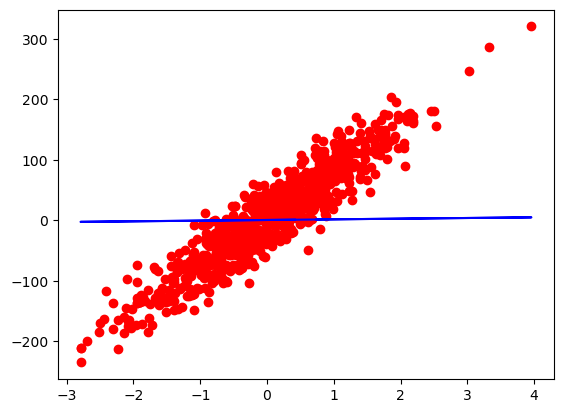

epoch 11: w = 14.682, loss = 4696.00244141


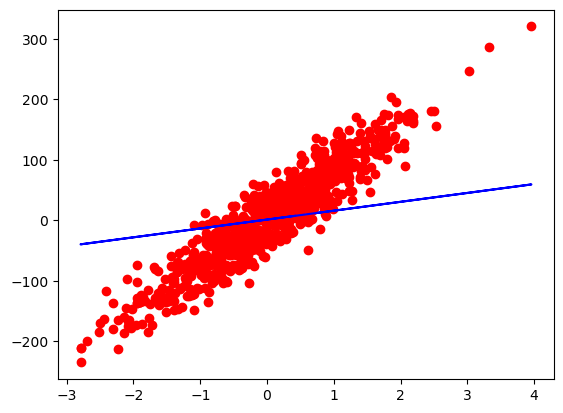

epoch 21: w = 25.782, loss = 3419.01928711


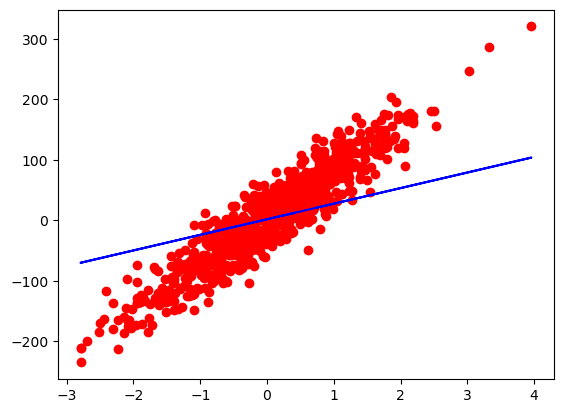

epoch 31: w = 34.850, loss = 2567.08837891


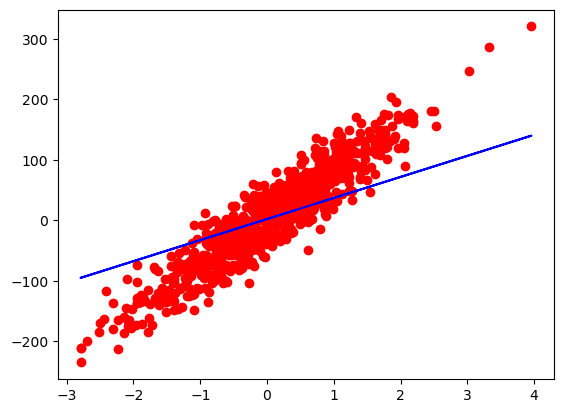

epoch 41: w = 42.260, loss = 1998.64599609


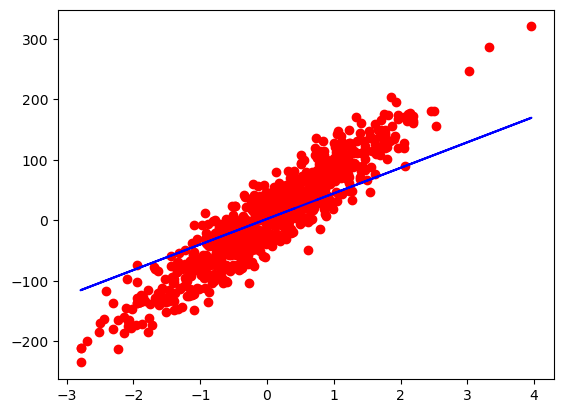

epoch 51: w = 48.313, loss = 1619.30200195


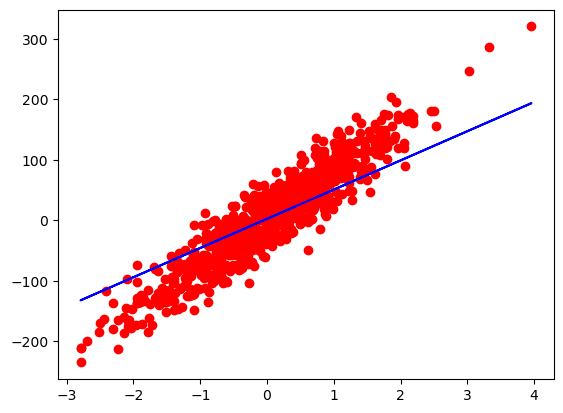

epoch 61: w = 53.260, loss = 1366.11364746


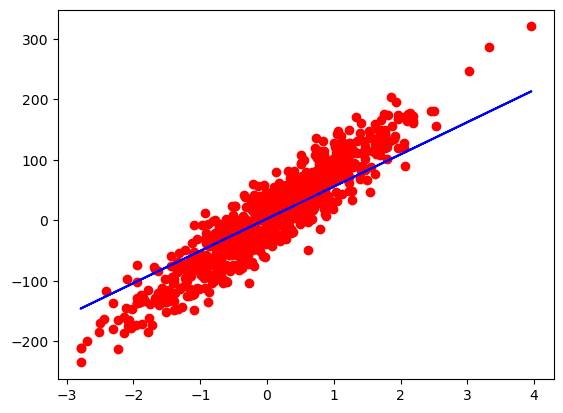

epoch 71: w = 57.302, loss = 1197.10119629


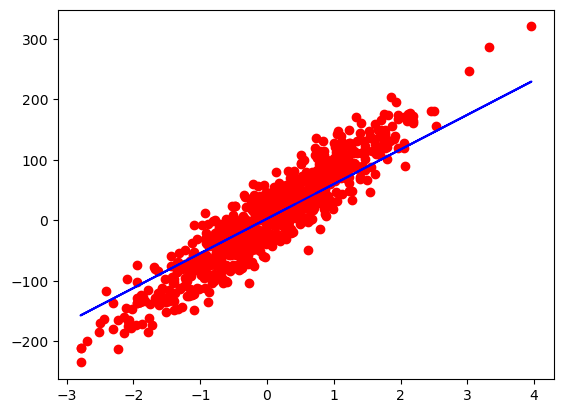

epoch 81: w = 60.605, loss = 1084.26318359


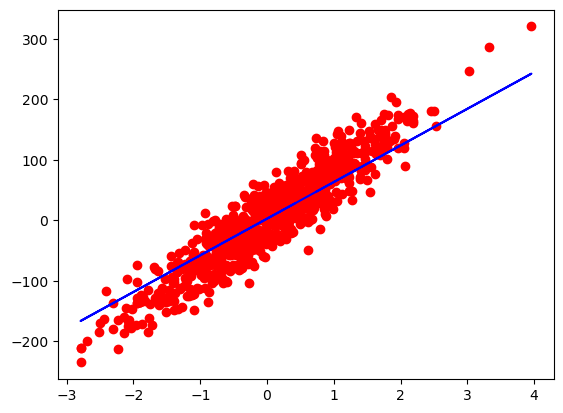

epoch 91: w = 63.304, loss = 1008.91741943


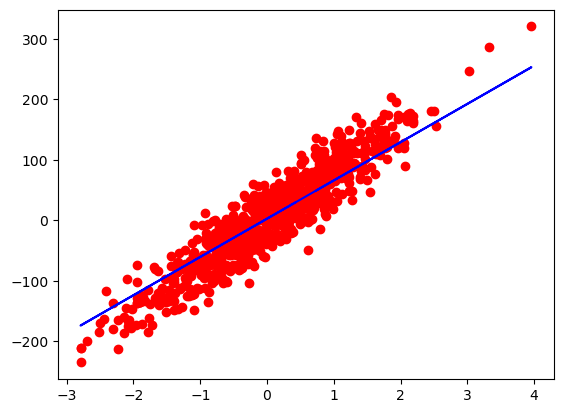

In [49]:
"""Training the model"""
epochs = 100
for e in range(epochs):
    y_predicted = model(x)
    l = loss(y_predicted, y)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if e%10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {e+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        predicted = model(x).detach().numpy()
        plt.plot(x_numpy, y_numpy, 'ro')
        plt.plot(x_numpy, predicted, 'b')
        plt.show()

In [50]:
"""show model parameters"""
[w,b] = model.parameters()
print(f'w = {w[0][0].item():.3f}, b = {b[0].item():.3f}')

w = 65.308, b = 2.752
